## Q-7. Imagine you have a dataset where you need to predict the Genres of Music using an Unsupervised algorithm and you need to find the accuracy of the model, built-in docker, and use some library to display that in frontend Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("data_2genre.csv")

In [3]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [4]:
df.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [5]:
df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            200 non-null    object 
 1   tempo               200 non-null    float64
 2   beats               200 non-null    int64  
 3   chroma_stft         200 non-null    float64
 4   rmse                200 non-null    float64
 5   spectral_centroid   200 non-null    float64
 6   spectral_bandwidth  200 non-null    float64
 7   rolloff             200 non-null    float64
 8   zero_crossing_rate  200 non-null    float64
 9   mfcc1               200 non-null    float64
 10  mfcc2               200 non-null    float64
 11  mfcc3               200 non-null    float64
 12  mfcc4               200 non-null    float64
 13  mfcc5               200 non-null    float64
 14  mfcc6               200 non-null    float64
 15  mfcc7               200 non-null    float64
 16  mfcc8   

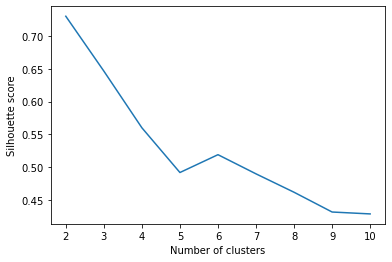

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Preprocess your data
df_numeric = df.drop(['filename'], axis=1)  # Remove non-numeric columns
df_numeric = df_numeric.fillna(0)  # Fill missing values, replace 0 with appropriate value
df_numeric = pd.get_dummies(df_numeric)  # Convert categorical variables to numeric using one-hot encoding

# Perform clustering and calculate silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df_numeric)
    score = silhouette_score(df_numeric, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [12]:
# Determine the optimal number of clusters
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_num_clusters)

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
labels = kmeans.fit_predict(df_numeric)

# Use the cluster labels for further analysis or visualization
# For example, you can add the labels to the original dataframe:
df['Cluster'] = labels

Optimal number of clusters: 2


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Drop non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
features = df[numeric_columns]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Select the features for clustering
features = df.drop(["filename", "label"], axis=1)

# Determine the number of clusters (e.g., using elbow method)
# Placeholder value - replace with appropriate method to determine the optimal number of clusters
number_of_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(features)

# Get the predicted cluster labels
predicted_labels = kmeans.labels_

# Add the predicted labels to the original dataset
df['predicted_label'] = predicted_labels

In [14]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, predicted_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7300342668630995


***silhouette score of 0.73 indicates a notable separation between clusters and suggests that the clustering algorithm has successfully grouped similar music genres together***

In [15]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)


0    109
1     91
Name: Cluster, dtype: int64


In [16]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


              tempo      beats  chroma_stft      rmse  spectral_centroid  \
Cluster                                                                    
0        125.335709  56.605505     0.268098  0.049228        1401.081499   
1        113.380564  54.406593     0.405281  0.207721        3187.336840   

         spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
Cluster                                                                    
0               1592.693023  2612.724033            0.077342 -307.371743   
1               3070.231836  6911.765806            0.139499  -58.057983   

              mfcc2  ...    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
Cluster              ...                                                     
0        138.746427  ... -1.947983 -0.856045 -0.611975  0.773564  0.055542   
1         63.727417  ... -0.492812 -0.552618 -0.365450 -0.849649 -0.287162   

           mfcc18    mfcc19    mfcc20     label  predicted_label  
Cluster   

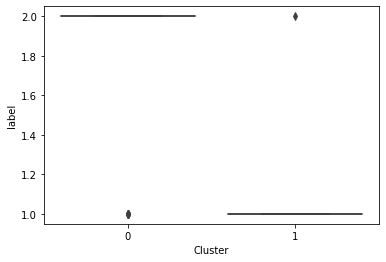

In [23]:
import seaborn as sns

sns.boxplot(x='Cluster', y='label', data=df)
plt.show()


In [18]:
cluster_0_data = df[df['Cluster'] == 0]
# Perform further analysis or visualization on cluster_0_data


In [19]:
cluster_0_data

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,predicted_label,Cluster
6,pop.00007.au,129.199219,63,0.251577,0.084314,1968.420512,2326.835760,4127.150044,0.082345,-224.429648,...,8.333522,7.580192,2.068624,4.557361,1.222659,-1.639573,-3.712766,1,1,0
9,pop.00003.au,92.285156,45,0.409987,0.129401,1837.123244,2066.889874,3670.894469,0.085352,-125.889050,...,2.053949,-2.337939,-1.483331,4.753721,-3.514642,4.894724,-3.201470,1,1,0
47,pop.00079.au,112.347147,53,0.351971,0.037580,1995.153380,2424.969478,4383.265162,0.072551,-273.261025,...,-6.779487,-3.817404,-6.237344,-5.614315,-4.016944,-2.390410,-3.084476,1,1,0
48,pop.00041.au,107.666016,52,0.282321,0.083328,2053.694268,2559.464985,4506.672749,0.075366,-204.740371,...,-9.050026,-10.189898,-4.044200,-7.752127,-5.135801,-1.835057,-4.427985,1,1,0
50,pop.00011.au,184.570312,85,0.225703,0.055817,2200.487385,2579.638044,4626.722023,0.087125,-240.650759,...,-9.316733,-3.170166,1.760828,1.582600,5.623299,4.959948,3.727813,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,classical.00020.au,143.554688,69,0.269065,0.038438,1218.290508,1353.616224,2295.177788,0.069813,-300.937697,...,-2.045668,-1.596437,0.646648,1.454414,-0.221094,-1.292084,-7.100527,2,1,0
196,classical.00072.au,117.453835,57,0.279421,0.020732,1284.921775,1659.622614,2476.568358,0.063750,-360.821769,...,-2.251255,-1.852868,2.215029,1.784788,-1.519674,-3.253521,3.998950,2,1,0
197,classical.00061.au,151.999081,76,0.281670,0.048189,1322.026416,1590.233329,2473.626709,0.076126,-274.426858,...,-3.028737,-4.697145,-7.715005,-7.212517,-5.410751,-5.246985,-5.270150,2,1,0
198,classical.00008.au,135.999178,67,0.254774,0.034038,1516.626219,1629.500705,2973.782018,0.078788,-292.128300,...,1.464333,3.393674,6.076538,0.963429,-0.753660,-2.105312,0.755132,2,1,0


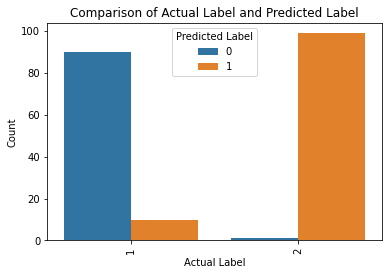

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the 'label' and 'predicted_label' columns

sns.countplot(x='label', hue='predicted_label', data=df)
plt.xlabel('Actual Label')
plt.ylabel('Count')
plt.title('Comparison of Actual Label and Predicted Label')
plt.legend(title='Predicted Label')
plt.xticks(rotation=90)
plt.show()
